<a href="https://colab.research.google.com/github/cactusvibeyjy/colab/blob/main/gen02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
gen=ImageDataGenerator(rotation_range=15, width_shift_range=0.2, shear_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [6]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32) /255.0

In [7]:
augment_ratio =1.5 #전체 데이터의 150%
augment_size = int(augment_ratio * x_train.shape[0])
print(augment_size)
#전체 x_train개수의 150% 비율만큼
randidx = np.random.randint(x_train.shape[0], size=augment_size)
#임의로 선택된 데이터는 원본데이터를 참조하기 때문에
#원본데이터에 영향을 줄 수 있음. 그래서 copy() 함수를 통해 안전하게 복사본 만듬
x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()

print(x_augmented.shape, y_augmented.shape)
#이미지 보강 실행
x_augmented, y_augmented = gen.flow(x_augmented, y_augmented, batch_size=augment_size, shuffle=False).next()

print(x_augmented.shape, y_augmented.shape)

75000
(75000, 32, 32, 3) (75000, 1)
(75000, 32, 32, 3) (75000, 1)


In [8]:
print(x_train.shape)

(50000, 32, 32, 3)


In [9]:
#x_train, y_train에 보강된 데이터 추가
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_augmented.shape, y_augmented.shape)

(75000, 32, 32, 3) (75000, 1)


In [15]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [16]:
from datetime import datetime
start_time = datetime.now()
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint=ModelCheckpoint(filepath="/data/bast.h5", monitor='val_loss', save_base_only=True, verbose=1)

hist=cnn.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

end_time=datetime.now()

Epoch 1/250
489/489 [==============================] - ETA: 0s - loss: 1.7075 - accuracy: 0.3659
Epoch 1: saving model to /data/bast.h5
489/489 [==============================] - 13s 24ms/step - loss: 1.7075 - accuracy: 0.3659 - val_loss: 1.3731 - val_accuracy: 0.5010
Epoch 2/250
487/489 [============================>.] - ETA: 0s - loss: 1.2956 - accuracy: 0.5411
Epoch 2: saving model to /data/bast.h5
489/489 [==============================] - 11s 22ms/step - loss: 1.2955 - accuracy: 0.5412 - val_loss: 0.9619 - val_accuracy: 0.6558
Epoch 3/250
487/489 [============================>.] - ETA: 0s - loss: 1.1041 - accuracy: 0.6134
Epoch 3: saving model to /data/bast.h5
489/489 [==============================] - 11s 22ms/step - loss: 1.1037 - accuracy: 0.6136 - val_loss: 0.8435 - val_accuracy: 0.7019
Epoch 4/250
487/489 [============================>.] - ETA: 0s - loss: 0.9854 - accuracy: 0.6595
Epoch 4: saving model to /data/bast.h5
489/489 [==============================] - 11s 23ms/step 

In [17]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.8492


[0.4642084538936615, 0.8492000102996826]

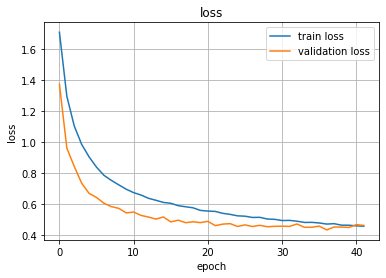

In [18]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.grid()
plt.show()

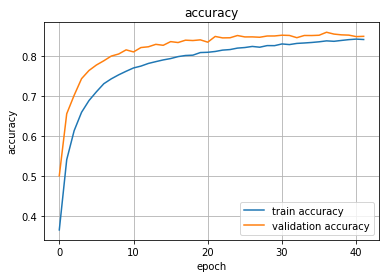

In [19]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()